In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sklearn

In [3]:
from sklearn.decomposition import PCA

In [4]:
model=PCA(n_components=1) #,whiten=True)

In [5]:
import pandas as pd

In [6]:
import codecs

root = '/Users/alehmann/Documents/Documents/HIH/BDA/BDA2017/data/'
def read_energi_data(f):
    with codecs.open(root+f,encoding='8859') as f:
        col = []
        l=f.readline().strip()
        while l:
            col.append(' '.join(l.split()[1:]))
            l=f.readline().strip()
        
        dat = pd.read_csv(f,sep=';', skipinitialspace=True,lineterminator ='\n',infer_datetime_format=True)
        dat = dat.drop(dat.columns[-1],1)
        
        dat.columns = [dat.columns[0]] + col
        dat = dat.set_index(dat.columns[0])
    return dat



In [7]:
energi = read_energi_data('20161208_onlinedata.txt')
co2 = energi['CO2 udledning']
energi

,Centrale kraftværker DK1,Centrale kraftværker DK2,Decentrale kraftværker DK1,Decentrale kraftværker DK2,Vindmøller DK1,Vindmøller DK2,Udveksling Jylland-Norge,Udveksling Jylland-Sverige,Udveksling Jylland-Tyskland,Udveksling Sjælland-Sverige,Udveksling Sjælland-Tyskland,Udveksling Bornholm-Sverige,Udveksling Fyn-Sjaelland,Temperatur i Malling,Vindhastighed i Malling,CO2 udledning,Havmøller DK,Landmøller DK,Solceller DK1,Solceller DK2
Dato og tid,,,,,,,,,,,,,,,,,,,,
2016-12-08 00:00,599,587,270,139,2721,733,-1527,-338,554,-669,113,-18,-381,10,9,190,1060,2394,0,0
2016-12-08 00:05,557,583,271,126,2757,732,-1508,-330,505,-726,247,-17,-318,10,11,184,1058,2430,0,0
2016-12-08 00:10,527,590,241,117,2746,742,-1516,-322,473,-734,304,-19,-256,10,11,180,1061,2427,0,0
2016-12-08 00:15,512,577,213,116,2750,741,-1518,-314,483,-670,304,-18,-193,10,9,175,1060,2431,0,0
2016-12-08 00:20,492,568,198,115,2759,749,-1520,-313,503,-668,304,-18,-192,10,8,170,1060,2448,0,0
2016-12-08 00:25,480,549,198,115,2750,745,-1519,-314,529,-688,304,-18,-230,10,9,166,1063,2431,0,0
2016-12-08 00:30,483,540,198,115,2736,741,-1520,-315,502,-687,304,-19,-231,10,8,166,1060,2418,0,0
2016-12-08 00:35,485,540,195,116,2736,743,-1522,-314,509,-690,304,-19,-231,10,9,166,1063,2416,0,0
2016-12-08 00:40,485,536,194,117,2733,742,-1522,-315,507,-689,304,-18,-231,10,9,165,1061,2415,0,0


In [8]:
energi=energi.drop(['Temperatur i Malling','Vindhastighed i Malling'],axis=1)
energi=energi.drop('CO2 udledning',axis=1)
energi=energi.drop('Havmøller DK',axis=1)
energi=energi.drop('Landmøller DK',axis=1)

In [9]:
energi=energi.drop('CO2 udledning',axis=1)
energi=energi.drop('Havmøller DK',axis=1)
energi=energi.drop('Landmøller DK',axis=1)

In [10]:
res = model.fit(energi)
res = res.transform(energi)

In [11]:
print(res.shape,energi.shape)

(288, 1) (288, 15)


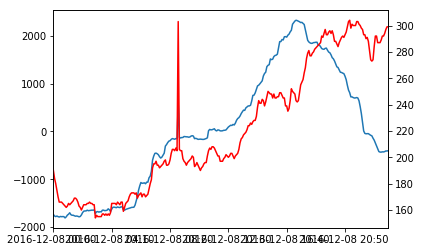

In [12]:
fig,ax = plt.subplots()

ax.plot(res) #plt.scatter(res[:,0],res[:,1])
ax2 = ax.twinx()
co2.plot(style='r')

In [13]:
model.explained_variance_ratio_

array([ 0.80525662])

In [14]:
np.sort(list(zip(model.components_[0],energi.columns)),axis=1)

array([['0.139389241952', 'Centrale kraftværker DK1'],
       ['0.0122298922639', 'Centrale kraftværker DK2'],
       ['0.0678999524955', 'Decentrale kraftværker DK1'],
       ['0.0166243846851', 'Decentrale kraftværker DK2'],
       ['-0.443890104834', 'Vindmøller DK1'],
       ['-0.0735127849995', 'Vindmøller DK2'],
       ['0.774768309303', 'Udveksling Jylland-Norge'],
       ['-0.0992271662968', 'Udveksling Jylland-Sverige'],
       ['-0.177258309211', 'Udveksling Jylland-Tyskland'],
       ['0.349469097553', 'Udveksling Sjælland-Sverige'],
       ['-0.0970749527157', 'Udveksling Sjælland-Tyskland'],
       ['0.00179653791589', 'Udveksling Bornholm-Sverige'],
       ['-0.00179277858836', 'Udveksling Fyn-Sjaelland'],
       ['0.00075482123539', 'Solceller DK1'],
       ['0.000246488301845', 'Solceller DK2']], 
      dtype='<U32')

In [15]:
a=list(zip(model.components_[0],energi.columns))

In [16]:
a.sort()
a

[(-0.44389010483378, 'Vindmøller DK1'),
 (-0.17725830921129238, 'Udveksling Jylland-Tyskland'),
 (-0.099227166296758221, 'Udveksling Jylland-Sverige'),
 (-0.097074952715711413, 'Udveksling Sjælland-Tyskland'),
 (-0.073512784999469602, 'Vindmøller DK2'),
 (-0.0017927785883600034, 'Udveksling Fyn-Sjaelland'),
 (0.00024648830184538349, 'Solceller DK2'),
 (0.00075482123539010815, 'Solceller DK1'),
 (0.0017965379158941335, 'Udveksling Bornholm-Sverige'),
 (0.012229892263924461, 'Centrale kraftværker DK2'),
 (0.016624384685136596, 'Decentrale kraftværker DK2'),
 (0.067899952495542593, 'Decentrale kraftværker DK1'),
 (0.13938924195222677, 'Centrale kraftværker DK1'),
 (0.34946909755271283, 'Udveksling Sjælland-Sverige'),
 (0.77476830930316887, 'Udveksling Jylland-Norge')]

In [17]:
from sklearn.svm import SVR

In [32]:
svr_model = SVR(kernel='linear')
svr_model_non = SVR(kernel='rbf')

In [33]:
svr_model.fit(energi,co2)
svr_model_non.fit(energi,co2)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [34]:
predict = svr_model.predict(energi)
predict_non = svr_model_non.predict(energi)

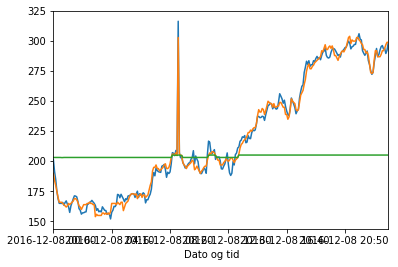

In [35]:
plot(predict)
co2.plot()
plot(predict_non)

In [39]:
svr_model.score(energi,co2)

0.99228069160613075

In [40]:
svr_model_non.score(energi,co2)

-0.075383054655297155